# Object Detection

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Object Detection on Color Space

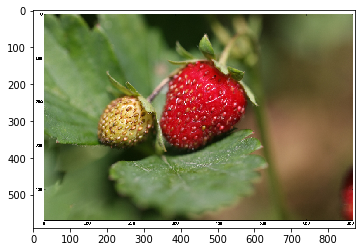

In [15]:
# Read sample image.
color_image = cv2.cvtColor(cv2.imread('../images/strawberry.png'), cv2.COLOR_BGR2RGB)
_ = plt.imshow(color_image)

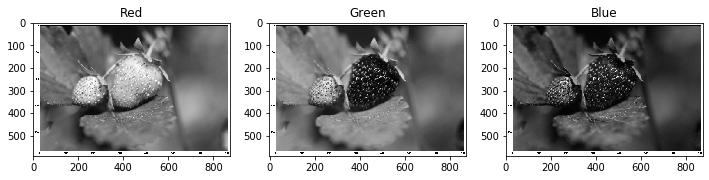

In [89]:
# Seperate channel.
red_channel = color_image[:,:,0]
green_channel = color_image[:,:,1]
blue_channel = color_image[:,:,2]

plt.figure(figsize=(12, 4))
plt.subplot(131).set_title('Red')
plt.imshow(red_channel, cmap='gray')
plt.subplot(132).set_title('Green')
plt.imshow(green_channel, cmap='gray')
plt.subplot(133).set_title('Blue')
_ = plt.imshow(blue_channel, cmap='gray')

232.25 118.0


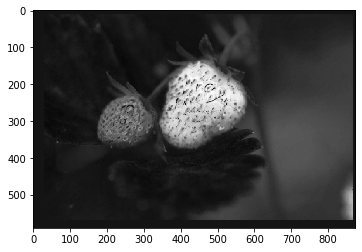

In [99]:
# Enhance red channel. Many approaches can be possible. ie. HSV color space.
fused_channel = red_channel / 2 + 127 - green_channel / 4 - blue_channel / 4
# red -> 255, white & black -> 127, green & blue -> 0
plt.imshow(fused_channel, cmap='gray')
print(np.max(fused_channel), np.min(fused_channel))

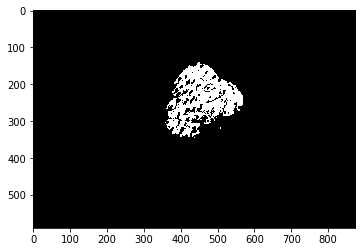

In [100]:
# Binarize.
threshold_value, binarized_image = cv2.threshold(fused_channel, 200, 255, cv2.THRESH_BINARY)
_ = plt.imshow(binarized_image, cmap='gray')

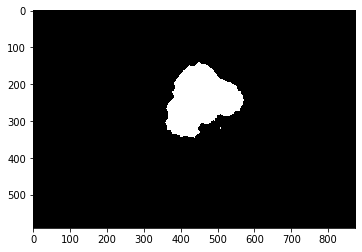

In [186]:
# Fill small gaps by closing operation.
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
closed_image = cv2.morphologyEx(binarized_image, cv2.MORPH_CLOSE, kernel)
_ = plt.imshow(closed_image, cmap='gray')

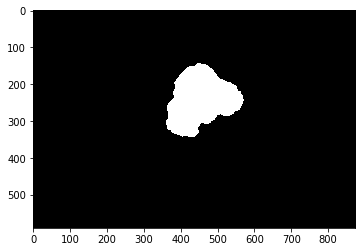

In [187]:
# Remove specks by opening operation.
opened_image = cv2.morphologyEx(closed_image, cv2.MORPH_OPEN, kernel)
_ = plt.imshow(opened_image, cmap='gray')

In [194]:
# Get contours.
# See https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html for more information.
contour_image = opened_image.astype(np.uint8)
_image, contours, hierarchy = cv2.findContours(contour_image,
                                               cv2.RETR_LIST,
                                               cv2.CHAIN_APPROX_SIMPLE)

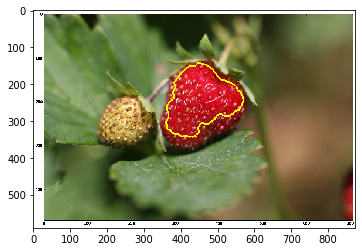

In [195]:
# Display results.
result_image = color_image.copy()
for contour in contours:
    x, y = contour[0][0]
    for [[newx, newy]] in contour:
        cv2.line(result_image, (x, y), (newx, newy), (255, 255, 0), 3)
        x, y = newx, newy
_ = plt.imshow(result_image, cmap='gray')

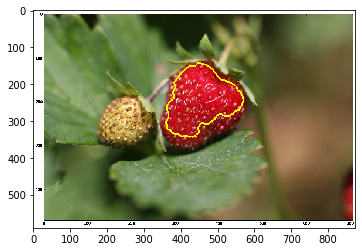

In [198]:
# Display results.
result_image = color_image.copy()
cv2.drawContours(result_image, contours, -1, (255, 255, 0), 3)
_ = plt.imshow(result_image, cmap='gray')

## Haar Feature-based Cascade Classifier for Object Detection

![](haarfeatures.png)

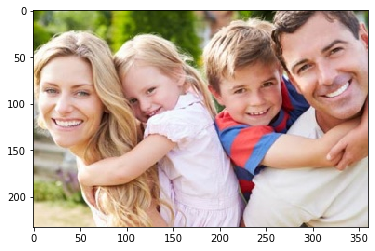

In [2]:
# Read image.
color_image = cv2.cvtColor(cv2.imread('../images/faces.jpg'), cv2.COLOR_BGR2RGB)
_ = plt.imshow(color_image)

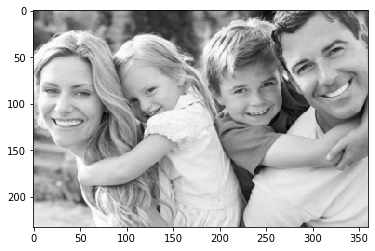

In [3]:
# Convert to gray-scale image.
gray_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
_ = plt.imshow(gray_image, cmap='gray')

In [4]:
# Get cascade classifier.
# pre-trained data from https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [5]:
# Detect face.
# See https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1)
print('faces =', faces, sep='\n')

faces =
[[202  59  69  69]
 [  1  58  79  79]]


In [ ]:
# Detect eye.
result_image = color_image.copy()

for (x, y, w, h) in faces:
    result_image = cv2.rectangle(result_image,
                                 (x, y), (x + w, y + h),
                                 (255, 0, 0), 2)
    roi_gray = gray_image[y:y + h, x:x + w]
    roi_color = result_image[y:y + h, x:x + w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey),(ex + ew, ey + eh), (0, 255, 0), 2)

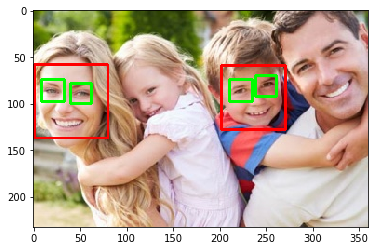

In [6]:
# Display results.
_ = plt.imshow(result_image)

## Reference
- https://github.com/llSourcell/Object_Detection_demo_LIVE
- https://github.com/opencv/opencv/tree/master/data/haarcascades
- https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html